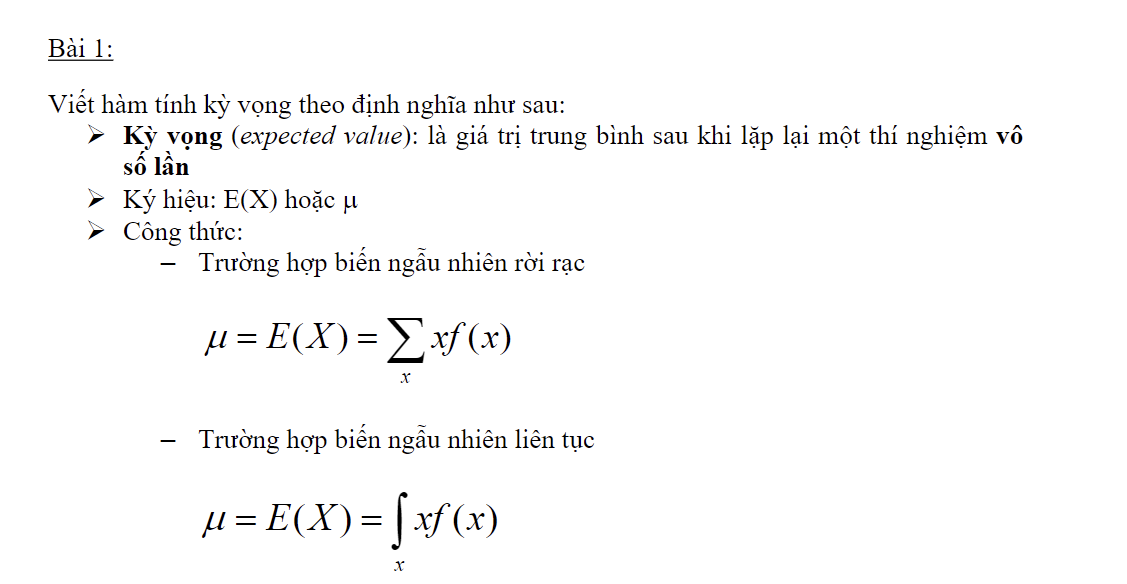

In [2]:
def expected_value_discrete(p, x):
    return sum([p[i] * x[i] for i in range(len(p))])

from scipy.integrate import quad

def expected_value_continuous(pdf, lower_bound, upper_bound):
    """
    Tính kỳ vọng cho biến ngẫu nhiên liên tục.
    :param pdf: Hàm mật độ xác suất (probability density function).
    :param lower_bound: Giới hạn dưới của tích phân.
    :param upper_bound: Giới hạn trên của tích phân.
    :return: Giá trị kỳ vọng.
    """
    result, _ = quad(lambda x: x * pdf(x), lower_bound, upper_bound)
    return result



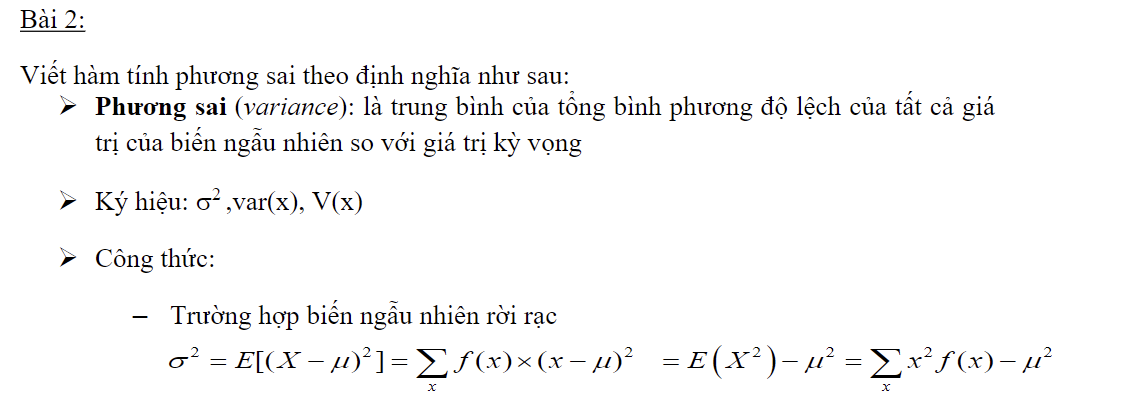
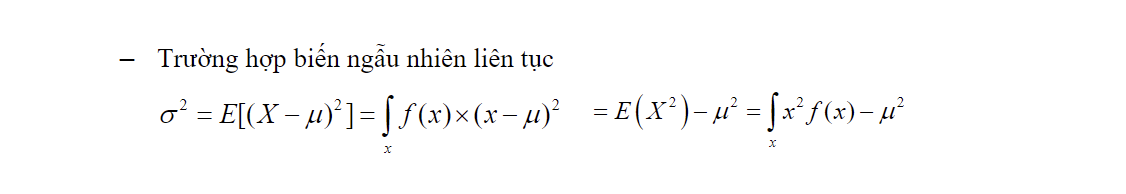

In [3]:
def variance_discrete (p, x):
    '''
    Tính phương sai cho biến ngẫu nhiên rời rạc
    :param p: List xác suất
    :param x: List các giá trị
    :return: Giá trị phương sai
    '''
    return sum([p[i] * (x[i] ** 2) for i in range(len(p))]) - (expected_value_discrete(p, x) ** 2)

def variance_continuous(pdf, lower_bound, upper_bound):
    """
    Tính phương sai cho biến ngẫu nhiên liên tục.
    :param pdf: Hàm mật độ xác suất (probability density function).
    :param lower_bound: Giới hạn dưới của tích phân.
    :param upper_bound: Giới hạn trên của tích phân.
    :return: Giá trị phương sai.
    """
    result, _ = quad(lambda x: (x - expected_value_continuous(pdf, lower_bound, upper_bound)) ** 2 * pdf(x), lower_bound, upper_bound)
    return result

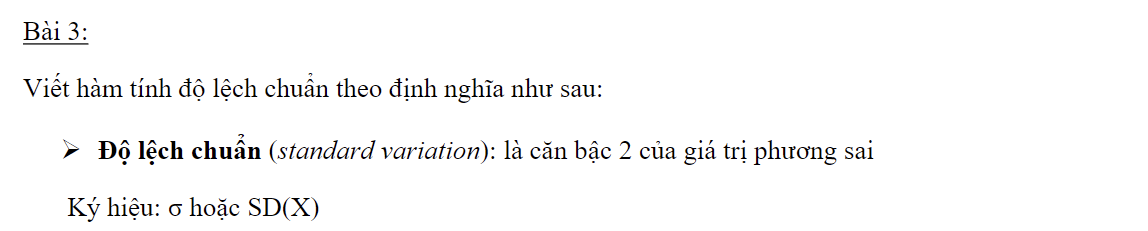

In [4]:
# Tinh do lech chuan
def standard_variance_discrete(p, x):
    return variance_discrete(p, x) ** .5

def standard_variance_continuous(pdf, lower_bound, upper_bound):
    return variance_continuous(pdf, lower_bound, upper_bound) ** .5

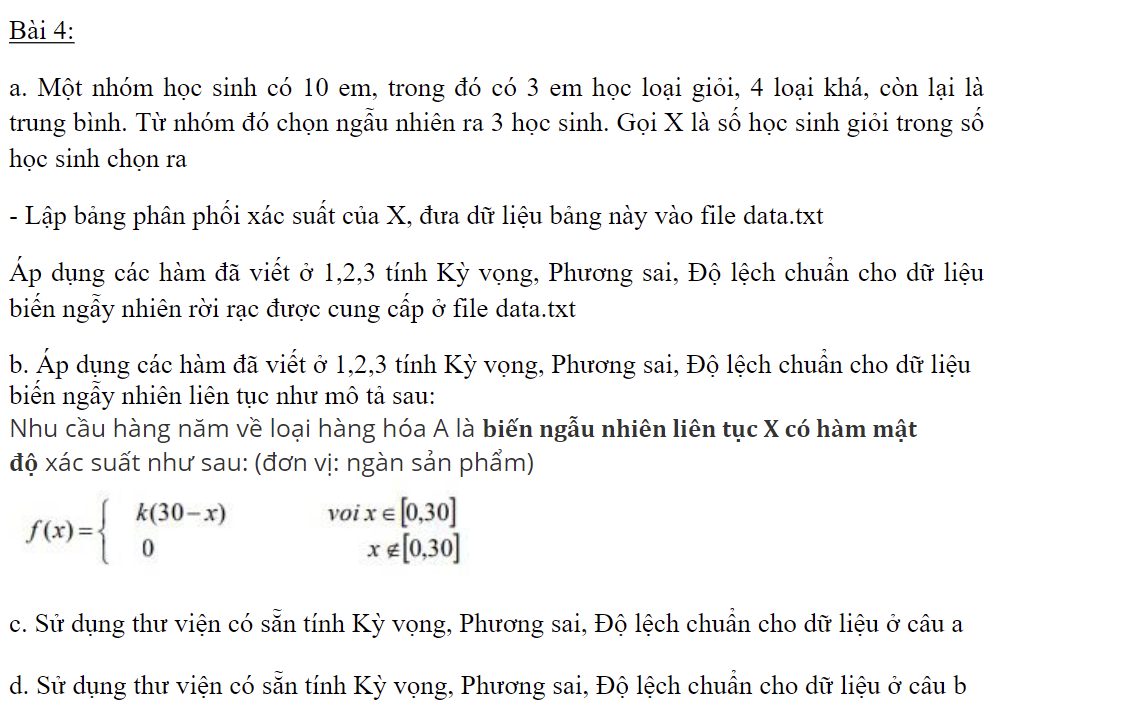

Một nhóm học sinh có 10 em, trong đó có 3 em học loại giỏi, 4 loại khá, còn lại là trung bình. Từ nhóm đó chọn ngẫu nhiên ra 3 học sinh. Gọi X là số học sinh giỏi trong số học sinh chọn ra
- Lập bảng phân phối xác suất của X, đưa dữ liệu bảng này vào file data.txt
- Viết các hàm tính kỳ vọng , phương sai , độ lệch chuẩn và áp dụng các hàm đã viết cho dữ liệu biến ngẫu nhiên rời rạc được cung cấp trong file data.txt



a) Ta có :

$ P(X = 0) = \displaystyle \frac{C_3^0 \times C_7^3}{C_{10}^3} = \frac{35}{120} = \frac{7}{24} \\$
$ P(X = 1) = \displaystyle \frac{C_3^1 \times C_7^2}{C_{10}^3} = \frac{63}{120} = \frac{21}{40} \\ $
$ P(X = 2) = \displaystyle \frac{C_3^2 \times C_7^1}{C_{10}^3} = \frac{21}{120} = \frac{7}{40} \\ $
$ P(X = 3) = \displaystyle \frac{C_3^3 \times C_7^0}{C_{10}^3} = \frac{1}{120}\\$

Bảng phân phối xác suất của X :
|X | 0 | 1 | 2 | 3 |
|---|---|---|---|---|
|P(X) | 7/24 | 21/40 | 7/40 | 1/120 |



In [4]:
# Cách 1 
import numpy as np  
X = np.array([0,1,2,3])
P = np.array([7/24,21/40,7/40,1/120])

# Đưa vào file data.txt
with open('data.txt','w') as f:
    f.write("X\tP\n")
    for i in range(len(X)):
        f.write("{}\t{}\n".format(X[i],P[i]))

In [5]:

from scipy.special import comb
import pandas as pd

# Cách 2
total_ways = comb(10, 3)
probabilities = {
    'X': [0, 1, 2, 3],
    'P_X': [
        comb(7, 3) / total_ways,
        comb(3, 1) * comb(7, 2) / total_ways,
        comb(3, 2) * comb(7, 1) / total_ways,
    comb(3, 3) / total_ways
    ]
}
df = pd.DataFrame(probabilities)
df.to_csv('data.txt', index=False, sep='\t')

In [8]:
# Đọc dữ liệu từ file data.txt
X = []
P = []
with open('data.txt','r') as f:
    for line in f.readlines()[1:]:
        x,p = line.split()
        X.append(int(x))
        P.append(float(p))

print("Kỳ vọng của X là : ",expected_value_discrete(P,X))
print("Phương sai của X là : ",variance_discrete(P,X))
print("Độ lệch chuẩn của X là : ",standard_variance_discrete(P,X))

Kỳ vọng của X là :  0.9
Phương sai của X là :  0.49
Độ lệch chuẩn của X là :  0.7


In [14]:
# câu c 

# Đọc dữ liệu từ file
df = pd.read_csv('data.txt', sep='\t')

# Tính kỳ vọng (E(X))
expected_value = np.sum(df['X'] * df['P_X'])

# Tính phương sai (Var(X))
variance = np.sum((df['X'] - expected_value) ** 2 * df['P_X'])

# Tính độ lệch chuẩn (σ)
standard_deviation = np.sqrt(variance)

print(f"Kỳ vọng (E(X)): {expected_value}")
print(f"Phương sai (Var(X)): {variance}")
print(f"Độ lệch chuẩn (σ): {standard_deviation}")


Kỳ vọng (E(X)): 0.8999999999999999
Phương sai (Var(X)): 0.4899999999999998
Độ lệch chuẩn (σ): 0.6999999999999998


b) Áp dụng các hàm đã viết tính Kỳ vọng , phương sai , độ lệch chuẩn cho dữ liệu biến ngẫu nhiên liên tục như mô tả sau :
$$f(x)=\left\{ \begin{matrix}
  & k(30-x) &,x \in [0,30] \\
 & 0\text{    } &,\text{ } x \notin [0,30] \\
\end{matrix} \right..$$

In [29]:
'''
b) Áp dụng các hàm đã viết tính Kỳ vọng , phương sai , độ lệch chuẩn cho dữ liệu biến ngẫu nhiên liên tục như mô tả sau :
$$f(x)=\left\{ \begin{matrix}
  & k(30-x) &,x \in [0,30] \\
 & 0\text{    } &,\text{ } x \notin [0,30] \\
\end{matrix} \right..$$
'''

# Định nghĩa hàm mật độ xác suất
def pdf(x):
    if 0 <= x <= 30:
        return k * (30 - x)
    else:
        return 0

# Tính hệ số k
k = 1/integrate(f,(x,0,30)) # Tích phân
print(f"k = {k}")

# Tính kỳ vọng
expected_value = expected_value_continuous(pdf, 0, 30)

# Tính phương sai
variance = variance_continuous(pdf, 0, 30)

# Tính độ lệch chuẩn
standard_deviation = standard_variance_continuous(pdf, 0, 30)

print(f"Kỳ vọng (E(X)): {expected_value}")
print(f"Phương sai (Var(X)): {variance}")
print(f"Độ lệch chuẩn (σ): {standard_deviation}")

k = 1/450
Kỳ vọng (E(X)): 10.000000000000002
Phương sai (Var(X)): 50.0
Độ lệch chuẩn (σ): 7.0710678118654755


In [37]:
from sympy import *
# câu d
x = symbols('x')
f = 30-x
F = integrate(f,x) # Nguyên hàm 
k = 1/integrate(f,(x,0,30)) # Tích phân
print(f"K = {k}")
E = integrate(x*k*f,(x,0,30)) # Kỳ vọng
var = integrate(x*x*k*f,(x,0,30))-E**2
std = np.sqrt(float(var)) # Độ lệch chuẩn
print(f"Kỳ vọng (E(X)): {E}")
print(f"Phương sai (Var(X)): {var}")
print(f"Độ lệch chuẩn (σ): {std}")


K = 1/450
Kỳ vọng (E(X)): 10
Phương sai (Var(X)): 50
Độ lệch chuẩn (σ): 7.0710678118654755
